# Linear Regression Example

A linear regression learning algorithm example using TensorFlow library.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [12]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [13]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [14]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [15]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [16]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.078258291 W= 0.26971012 b= 0.65675
Epoch: 0100 cost= 0.078110337 W= 0.2685137 b= 0.66535646
Epoch: 0150 cost= 0.077979550 W= 0.26738846 b= 0.6734514
Epoch: 0200 cost= 0.077863969 W= 0.2663302 b= 0.6810645
Epoch: 0250 cost= 0.077761784 W= 0.26533484 b= 0.68822485
Epoch: 0300 cost= 0.077671491 W= 0.26439866 b= 0.69495976
Epoch: 0350 cost= 0.077591687 W= 0.26351827 b= 0.7012938
Epoch: 0400 cost= 0.077521190 W= 0.26268998 b= 0.7072518
Epoch: 0450 cost= 0.077458881 W= 0.26191106 b= 0.7128553
Epoch: 0500 cost= 0.077403814 W= 0.26117846 b= 0.71812564
Epoch: 0550 cost= 0.077355184 W= 0.26048946 b= 0.72308236
Epoch: 0600 cost= 0.077312194 W= 0.25984126 b= 0.7277451
Epoch: 0650 cost= 0.077274248 W= 0.2592317 b= 0.73213077
Epoch: 0700 cost= 0.077240705 W= 0.25865853 b= 0.7362543
Epoch: 0750 cost= 0.077211112 W= 0.2581192 b= 0.7401338
Epoch: 0800 cost= 0.077184968 W= 0.25761196 b= 0.7437826
Epoch: 0850 cost= 0.077161856 W= 0.25713494 b= 0.74721444
Epoch: 0900 cost= 0.077141486 

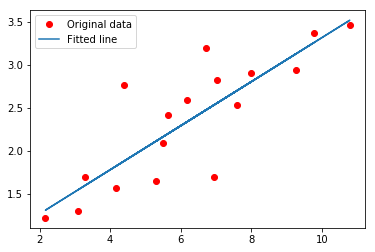

In [17]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [11]:
# Regression result